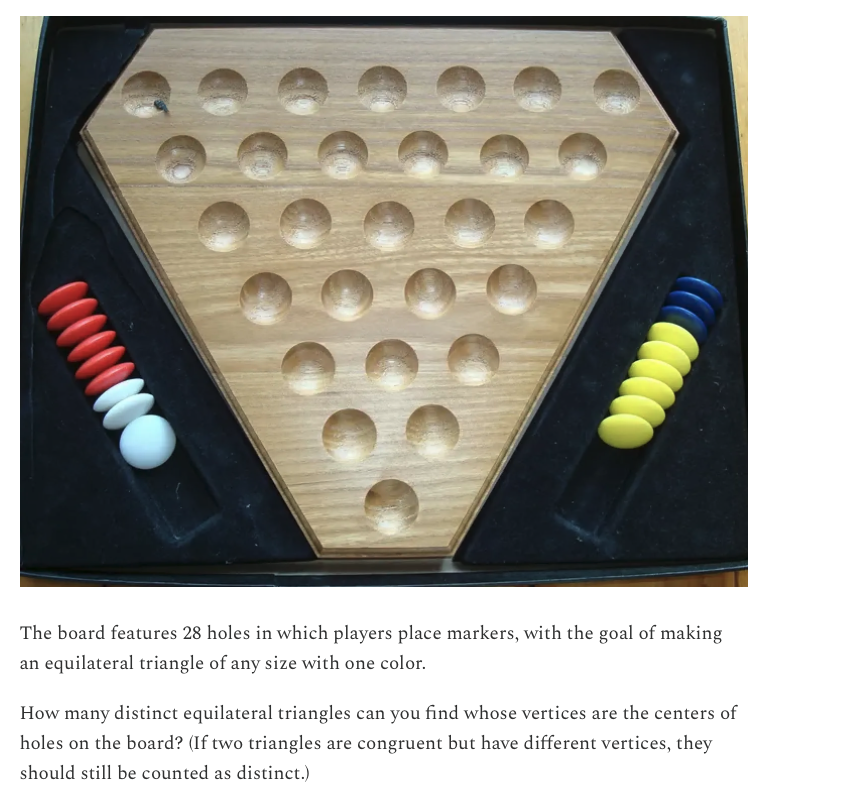


126


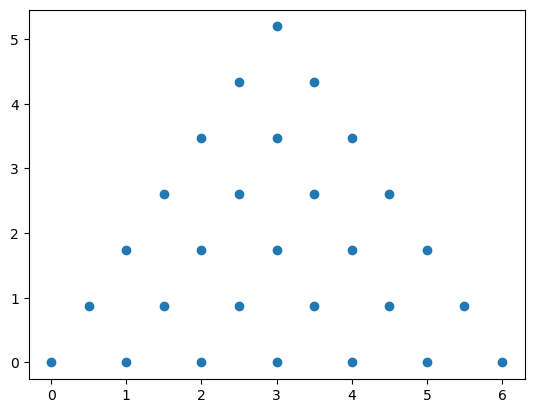

In [ ]:
# Lets set up the board in python for each
import numpy as np
from itertools import combinations

eps = 10**-12


def triangle_points(n):
    #  for a triangle with n points in the base, starting at (0, 0),
    # get all the points in the triangle
    points = []
    for k in range(n, 0, -1):
        x0, y0 = 1 / 2 * (n - k), np.sqrt(3) / 2 * (n - k)
        for i in range(k):
            x1, y1 = x0 + i, y0
            points.append((x1, y1))
    return points


def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


def equilateral_points(p1, p2, p3):
    # returns true if the three points form an equilateral triangle
    # Note, the points cannot be colinear if the distance any pair is the same,
    # by the triangle inequality

    d1 = dist(p1, p2)
    d2 = dist(p1, p3)
    d3 = dist(p2, p3)
    return abs(d1 - d2) < eps and abs(d2 - d3) < eps and abs(d1 - d3) < eps


def count_equilateral_triangles(points):
    # counts all sets of 3 points from a set of points that form equilateral triangles
    count = 0
    for p1, p2, p3 in combinations(points, 3):
        if equilateral_points(p1, p2, p3):
            count += 1
    return count


# now plot the points
import matplotlib.pyplot as plt

points = triangle_points(7)
print(count_equilateral_triangles(points))
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

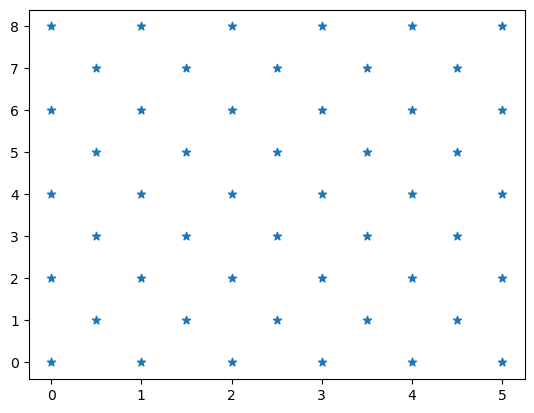

there are 5918 parallelograms


In [21]:
# now lets build the american flag with the points
from itertools import combinations, permutations


def build_stars(num_rows, num_cols):
    # Build our flag with num_row rows and num_cols columns
    points = []
    for r in range(num_rows):
        x0, y0 = (0, r) if r % 2 == 0 else (1 / 2, r)
        num_stars = num_cols if r % 2 == 0 else num_cols - 1
        for i in range(num_stars):
            x1, y1 = x0 + i, y0
            points.append((x1, y1))
    return points


def not_colinear(p1, p2, p3, p4):
    # We can do a cross product to see if the points are colinear
    x1 = p1[0] - p2[0]
    y1 = p1[1] - p2[1]
    x2 = p3[0] - p4[0]
    y2 = p3[1] - p4[1]
    return abs(x1 * y2 - x2 * y1) > eps


def check_midpoints(p1, p2, p3, p4):
    # four (non-colinear) points form a parrallelogram if the midpoints of the diagonals are the same
    m1 = (p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2
    m2 = (p3[0] + p4[0]) / 2, (p3[1] + p4[1]) / 2
    return dist(m1, m2) < eps


def is_parallelogram(p1, p2, p3, p4):
    # returns true if the points can form a parallelogram
    # try the pairings of the points and see if they form a parallelogram

    # get all the possible pairings of the points (room for improvement here)
    for perm in permutations([p1, p2, p3, p4]):
        np1, np2, np3, np4 = perm
        if not_colinear(np1, np2, np3, np4) and check_midpoints(np1, np2, np3, np4):
            return True

    return False


def count_parallelograms(points):
    count = 0
    for p1, p2, p3, p4 in combinations(points, 4):
        if is_parallelogram(p1, p2, p3, p4):
            count += 1
    return count


points = build_stars(9, 6)

x, y = zip(*points)
plt.scatter(x, y, marker="*")
plt.show()

print(f"there are {count_parallelograms(points)} parallelograms")